# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['cidreira',
 'shache',
 'kodiak',
 'mar del plata',
 'manuk mangkaw',
 'hobart',
 'new norfolk',
 'rawson',
 'agutaya',
 'punta arenas',
 'kapaa',
 'jiddah',
 'avera',
 'tuktoyaktuk',
 'kerema',
 'ushuaia',
 'bilma',
 'barentsburg',
 'saint-philippe',
 'bianzhuang',
 'zhireken',
 'necochea',
 'taolanaro',
 'arona',
 'teluk nibung',
 'porto novo',
 'mizdah',
 'kota bahru',
 'komsomolskiy',
 'east london',
 'albany',
 'vaini',
 'rikitea',
 'port alfred',
 'carnarvon',
 'baia-sprie',
 'bambous virieux',
 'bilibino',
 'shizuishan',
 'goderich',
 'kruisfontein',
 'victoria',
 'margate',
 'nelson bay',
 'dongsheng',
 'castro',
 'ribeira grande',
 'puerto madero',
 'petropavlovsk-kamchatskiy',
 'hokitika',
 'kulhudhuffushi',
 'cap malheureux',
 'nuuk',
 'kristinehamn',
 'busselton',
 'atuona',
 'constitucion',
 'dondaicha',
 'ukiah',
 'arraial do cabo',
 'pouembout',
 'guerrero negro',
 'yanam',
 'port elizabeth',
 'salinopolis',
 'azare',
 'oktyabrskoye',
 'bredasdorp',
 'dikson',
 'upernav

In [3]:
print(len(cities))

632


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"

#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|cidreira
Processing record 2|shache
Processing record 3|kodiak
Processing record 4|mar del plata
Processing record 5|manuk mangkaw
Processing record 6|hobart
Processing record 7|new norfolk
Processing record 8|rawson
Processing record 9|agutaya
Processing record 10|punta arenas
Processing record 11|kapaa
City not found. Skipping.
Processing record 12|avera
Processing record 13|tuktoyaktuk
Processing record 14|kerema
Processing record 15|ushuaia
Processing record 16|bilma
City not found. Skipping.
Processing record 17|saint-philippe
Processing record 18|bianzhuang
Processing record 19|zhireken
Processing record 20|necochea
City not found. Skipping.
Processing record 21|arona
Processing record 22|teluk nibung
Processing record 23|porto novo
Processing record 24|mizdah
Processing record 25|kota bahru
Processing record 26|komsomolskiy
Processing record 27|east london
Processing record 28|albany
Processing record 29|vaini
Processing record 30|rikitea
Processing record 31

Processing record 248|esperance
Processing record 249|maralal
Processing record 250|motygino
City not found. Skipping.
Processing record 251|micheweni
Processing record 252|maneadero
Processing record 253|lebu
Processing record 254|corrales
Processing record 255|polis
Processing record 256|guaruja
Processing record 257|oros
Processing record 258|neiafu
Processing record 259|faanui
City not found. Skipping.
Processing record 260|alofi
Processing record 261|doha
Processing record 262|paralia
Processing record 263|joshimath
Processing record 264|quelimane
City not found. Skipping.
Processing record 265|nishihara
Processing record 266|kontagora
Processing record 267|nador
Processing record 268|monrovia
Processing record 269|suntar
Processing record 270|taga
Processing record 271|avarua
Processing record 272|antalaha
Processing record 273|cherskiy
Processing record 274|gayny
Processing record 275|high rock
Processing record 276|pechenga
Processing record 277|tasiilaq
Processing record 278|h

Processing record 495|syracuse
Processing record 496|kasongo-lunda
Processing record 497|grand forks
Processing record 498|mayya
Processing record 499|port macquarie
Processing record 500|puerto ayacucho
Processing record 501|yumen
Processing record 502|araouane
Processing record 503|ilabaya
Processing record 504|sao miguel do tapuio
Processing record 505|waingapu
Processing record 506|ratnapura
Processing record 507|ulaangom
Processing record 508|altay
Processing record 509|grand gaube
Processing record 510|havoysund
Processing record 511|juneau
Processing record 512|jalu
Processing record 513|kaita
Processing record 514|lake havasu city
City not found. Skipping.
Processing record 515|kutum
Processing record 516|evensk
Processing record 517|alta floresta
Processing record 518|kokstad
Processing record 519|kajaani
Processing record 520|kaeo
Processing record 521|san vicente
Processing record 522|raga
Processing record 523|narovchat
Processing record 524|skjervoy
Processing record 525|b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Dataframe


weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df.head()



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,294.16,65,{'all': 49},1.70,BR,1633529591
1,Shache,38.4167,77.2406,289.24,33,{'all': 3},0.83,CN,1633529591
2,Saint Paul Harbor,57.7900,-152.4072,280.44,93,{'all': 100},3.21,US,1633529592
3,Mar del Plata,-38.0023,-57.5575,284.33,65,{'all': 40},10.73,AR,1633529351
4,Manuk Mangkaw,4.8000,119.8500,302.25,75,{'all': 45},5.10,PH,1633529592


In [7]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [8]:
humidity

[65,
 33,
 93,
 65,
 75,
 69,
 67,
 30,
 75,
 57,
 80,
 93,
 85,
 87,
 66,
 9,
 84,
 80,
 96,
 69,
 58,
 89,
 67,
 17,
 83,
 76,
 73,
 95,
 88,
 80,
 76,
 72,
 88,
 99,
 59,
 82,
 59,
 78,
 65,
 66,
 81,
 63,
 88,
 83,
 70,
 94,
 79,
 73,
 70,
 89,
 70,
 80,
 44,
 70,
 87,
 73,
 82,
 77,
 89,
 82,
 63,
 17,
 100,
 62,
 99,
 52,
 100,
 93,
 65,
 89,
 76,
 93,
 87,
 87,
 51,
 7,
 16,
 55,
 90,
 28,
 88,
 79,
 82,
 90,
 84,
 37,
 22,
 97,
 66,
 70,
 51,
 83,
 99,
 82,
 74,
 51,
 91,
 69,
 88,
 57,
 71,
 60,
 9,
 10,
 81,
 77,
 98,
 82,
 85,
 47,
 61,
 65,
 44,
 72,
 37,
 82,
 95,
 100,
 72,
 78,
 34,
 55,
 71,
 88,
 76,
 17,
 82,
 85,
 71,
 72,
 61,
 34,
 39,
 90,
 83,
 92,
 84,
 88,
 92,
 80,
 67,
 77,
 51,
 97,
 52,
 68,
 88,
 72,
 97,
 87,
 68,
 38,
 74,
 85,
 88,
 40,
 80,
 93,
 71,
 53,
 85,
 71,
 67,
 81,
 88,
 72,
 80,
 84,
 40,
 57,
 93,
 77,
 27,
 35,
 56,
 68,
 77,
 82,
 78,
 78,
 54,
 26,
 78,
 86,
 97,
 89,
 73,
 71,
 55,
 74,
 81,
 90,
 89,
 46,
 66,
 23,
 74,
 38,
 21,
 60,


In [9]:

print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

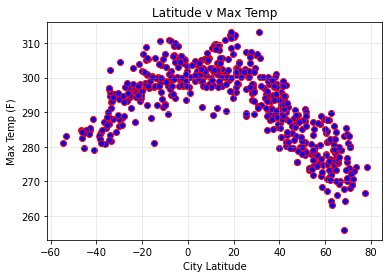

In [12]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

## Latitude vs. Humidity Plot

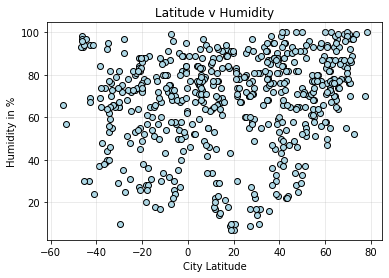

In [13]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Humidity")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity in %")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

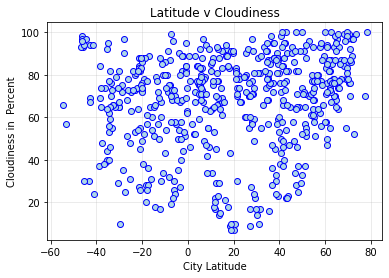

In [16]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "black", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression